In [142]:
  
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [143]:

dataset = pd.read_csv("E:\TE_Project\datacsv\India.csv")
print ("Total number of rows in dataset: {}\n".format(len(dataset)))
print(dataset.head())


Total number of rows in dataset: 2009

    date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0  2015-01-01        24        11           0.0      8.7        5   
1  2015-01-02        18        11           0.0      5.5        3   
2  2015-01-03        19        13           0.0      8.7        5   
3  2015-01-04        23        13           0.0      8.7        5   
4  2015-01-05        21        10           0.0      8.7        5   

   moon_illumination  moonrise   moonset   sunrise  ... WindGustKmph  \
0                 72  02:39 PM  03:24 AM  07:14 AM  ...           10   
1                 80  03:27 PM  04:21 AM  07:14 AM  ...           15   
2                 87  04:16 PM  05:16 AM  07:15 AM  ...            8   
3                 94  05:08 PM  06:08 AM  07:15 AM  ...           18   
4                100  06:01 PM  06:57 AM  07:15 AM  ...           23   

   cloudcover  humidity  precipMM  pressure  tempC  visibility  winddirDegree  \
0          14        37       0.

In [144]:
features =[ 'date_time','maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'DewPointC',
       'FeelsLikeC', 'HeatIndexC', 'cloudcover', 'humidity', 'pressure',
       'visibility', 'windspeedKmph']
target = 'tempC'

In [145]:
dataset['date_time'] = pd.to_datetime(dataset['date_time'], format='%Y-%m-%d')

In [146]:
print (dataset)
print (dataset.dtypes)

      date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0    2015-01-01        24        11           0.0      8.7        5   
1    2015-01-02        18        11           0.0      5.5        3   
2    2015-01-03        19        13           0.0      8.7        5   
3    2015-01-04        23        13           0.0      8.7        5   
4    2015-01-05        21        10           0.0      8.7        5   
...         ...       ...       ...           ...      ...      ...   
2004 2020-06-27        43        33           0.0     14.0        8   
2005 2020-06-28        45        34           0.0     12.2        9   
2006 2020-06-29        43        38           0.0     13.3        9   
2007 2020-06-30        46        30           0.0     14.0       10   
2008 2020-07-01        47        36           0.0     14.0       10   

      moon_illumination  moonrise     moonset   sunrise  ... WindGustKmph  \
0                    72  02:39 PM    03:24 AM  07:14 AM  ...          

In [147]:
dataset["date_time"]= dataset["date_time"].dt.strftime("%Y%m%d")

In [148]:
print (dataset)
print (dataset.dtypes)

     date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0     20150101        24        11           0.0      8.7        5   
1     20150102        18        11           0.0      5.5        3   
2     20150103        19        13           0.0      8.7        5   
3     20150104        23        13           0.0      8.7        5   
4     20150105        21        10           0.0      8.7        5   
...        ...       ...       ...           ...      ...      ...   
2004  20200627        43        33           0.0     14.0        8   
2005  20200628        45        34           0.0     12.2        9   
2006  20200629        43        38           0.0     13.3        9   
2007  20200630        46        30           0.0     14.0       10   
2008  20200701        47        36           0.0     14.0       10   

      moon_illumination  moonrise     moonset   sunrise  ... WindGustKmph  \
0                    72  02:39 PM    03:24 AM  07:14 AM  ...           10   
1    

In [149]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features], dataset[target],
                                                    train_size=0.7, test_size=0.3, shuffle=False)

In [168]:
print("X_train: {}, x_test: {}".format(len(x_train), len(x_test)))
print("y_train: {}, y_test: {}".format(len(y_train), len(y_test)))

X_train: 1406, x_test: 603
y_train: 1406, y_test: 603


In [169]:
x_train.head()

,date_time,maxtempC,mintempC,sunHour,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,cloudcover,humidity,pressure,visibility,windspeedKmph
0,20150101,24,11,8.7,5,1,16,16,14,37,1017,10,6
1,20150102,18,11,5.5,3,6,13,14,60,62,1019,8,10
2,20150103,19,13,8.7,5,12,15,15,38,82,1018,10,5
3,20150104,23,13,8.7,5,8,16,17,1,60,1019,10,12
4,20150105,21,10,8.7,5,4,14,15,0,48,1016,10,16


In [170]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [171]:
prediction=model.predict(x_test)

In [172]:
y_pred = model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.head

<bound method NDFrame.head of       Actual  Predicted
1406      33       33.0
1407      33       33.0
1408      34       34.0
1409      35       35.0
1410      32       32.0
...      ...        ...
2004      43       43.0
2005      45       45.0
2006      43       43.0
2007      46       46.0
2008      47       47.0

[603 rows x 2 columns]>

Text(0, 0.5, 'Predicted Values')

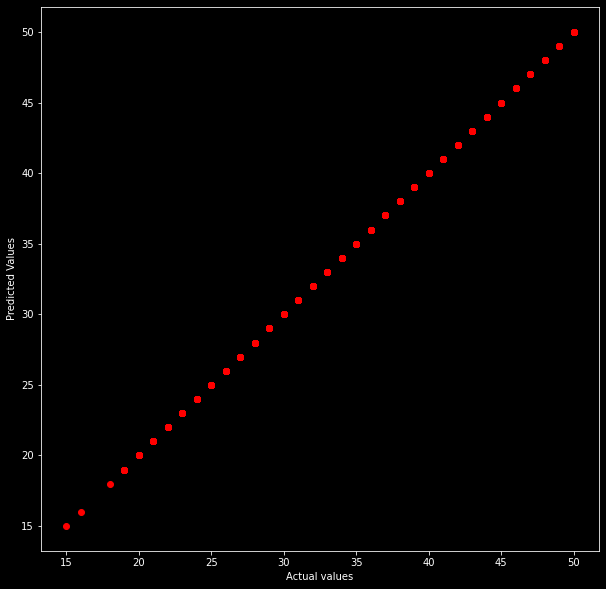

In [175]:
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, c = 'red')
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')